In [ ]:
!pip install top2vec

In [1]:
!pip install top2vec[sentence_encoders]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.1 MB 1.6 MB/s 
     |████████████████████████████████| 88 kB 6.5 MB/s 
     |████████████████████████████████| 5.2 MB 5.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 5.9 MB 43.3 MB/s 
     |████████████████████████████████| 1.1 MB 46.8 MB/s 
     |████████████████████████████████| 578.0 MB 13 kB/s 
INFO: pip is looking at multiple versions of tensorflow-text to determine which version is compatible with other requirements. This could take a while.
     |████████████████████████████████| 4.6 MB 33.1 MB/s 
  Created wheel for hdbscan: filename=hdbscan-0.8.29-cp37-cp37m-linux_x86_64.whl size=2340735 sha256=f0d75bf749cfb0ec4f5cfb8ca7efbd7e5a61f0f727a977e0c7851e656a070774
  Stored in directory: /root/.cache/pip/wheels/93/78/2

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from top2vec import Top2Vec

In [4]:
documents = []

with open("/content/drive/My Drive/final2_tweets_cleaned.txt", 'r', encoding='utf-8') as f:
  for line in f:
    documents.append(line)
    

In [ ]:
documents

In [ ]:
short_docs = ''
condensed_docs=[]
ind = 0
for doc in documents:
  if len(doc.split()) < 20:
    short_docs = doc + ' ' + short_docs
  else:
    condensed_docs.append(doc)
  
short_docs.replace('\n',' ')
condensed_docs.append(short_docs)
condensed_docs


Remove Stopwords

In [7]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
nltk.download('omw-1.4')
nltk.download('wordnet')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [9]:
from nltk.corpus import stopwords
import string

In [39]:
english_stop_words = stopwords.words('english')
new_stopwords = ["all", "due", "to", "on", "would", "like", "us", "&amp", "get", "one", "dont", "arent","im",'don','conservatives','conservative','liberals','liberal','gvt','canada','canadian','enough']
english_stop_words.extend(new_stopwords)

def remove_stop_words(corpus):
    removed_stop_words = []
    for review in corpus:
      if review != "\n":
        review = review.translate(str.maketrans('', '', string.punctuation))
        removed_stop_words.append(
            ' '.join([word for word in review.split() 
                      if word.lower() not in english_stop_words])
        )
    return removed_stop_words

In [40]:
stopword_omitted_docs = []
stopword_omitted_docs = remove_stop_words(documents)

In [22]:
from nltk.stem import WordNetLemmatizer
def get_lemmatized_text(corpus):
    lemmatizer = WordNetLemmatizer()
    return [' '.join([lemmatizer.lemmatize(word) for word in review.split()]) for review in corpus]
    
stopword_omitted_docs = get_lemmatized_text(stopword_omitted_docs)

In [ ]:
stopword_omitted_docs

Run Topic2Vec algorithm 

In [30]:
model = Top2Vec(stopword_omitted_docs, embedding_model='universal-sentence-encoder')

2022-11-13 04:05:36,315 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
2022-11-13 04:05:36,748 - top2vec - INFO - Downloading universal-sentence-encoder model
INFO:top2vec:Downloading universal-sentence-encoder model
2022-11-13 04:05:43,436 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2022-11-13 04:05:43,985 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2022-11-13 04:05:50,565 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2022-11-13 04:05:50,589 - top2v

In [ ]:
topic_words_common, word_scores_common, topic_nums_common = model.get_topics()

In [ ]:
topic_words_common

array([['trudeau', 'government', 'canada', 'people', 'need'],
       ['need', 'people', 'canada', 'government', 'trudeau']],
      dtype='<U10')

In [ ]:
topic_nums_common

array([0, 1])

In [ ]:
word_scores_common

array([[0.3454442 , 0.26356086, 0.20885661, 0.16526273, 0.12532377,
        0.10129353, 0.09983489, 0.0978674 , 0.0898557 , 0.03894313,
        0.01907769],
       [0.54432416, 0.53557414, 0.48140305, 0.39449185, 0.38687232,
        0.3694604 , 0.2983499 , 0.25400928, 0.24096775, 0.22544223,
        0.16392004]], dtype=float32)

In [30]:
model_doc2vec = Top2Vec(stopword_omitted_docs, min_count=10, ngram_vocab=True)

2022-11-14 17:28:11,145 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
2022-11-14 17:28:11,203 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2022-11-14 17:28:12,803 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2022-11-14 17:28:17,121 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2022-11-14 17:28:17,150 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


In [16]:
doc2vec_topic_words, doc2vec_word_scores, doc2vec_topic_nums = model_doc2vec.get_topics()

In [17]:
doc2vec_topic_nums

array([0, 1])

In [18]:
doc2vec_topic_words

array([['foreign policy', 'you re', 'emergencies act', 'someone',
        'canadian', 'move', 'take', 'means', 'don', 'environment', 'job',
        'canadas', 'gov', 'alberta', 'oil', 'making', 'hard', 'needed',
        'think', 'may', 'agree', 'great', 'it', 'you', 'canadians',
        'twitter', 'country', 'liberals', 'point', 'since', 'bill',
        'something', 'anything', 'without', 'children', 'real', 'canada',
        'sure', 'help', 'back', 'want', 're', 'didn', 'many', 'trudeau',
        'years', 'already', 'see', 'need', 'ever'],
       ['media', 'needed', 'war', 'really', 'let', 'time', 'high',
        'used', 'pay', 'inflation', 'week', 'tell', 'give', 'also',
        'first', 'making', 'away', 'find', 'keep', 'look', 'stay',
        'already', 'didn', 'makes', 'anyone', 'prime minister', 'know',
        'got', 'health', 'you', 'sure', 'could', 'left', 'understand',
        'everyone', 'isnt', 'govt', 'state', 'freedom', 'smith', 'hes',
        'world', 'think', 'policy', 

Model with min frequency count 10

In [41]:
model_min_freq_10 = Top2Vec(stopword_omitted_docs, embedding_model='universal-sentence-encoder', min_count=10, ngram_vocab=True)

2022-11-14 17:44:27,828 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


ValueError: ignored

In [22]:
topic_words_min_freq_10, word_scores_min_freq_10, topic_nums_min_freq_10 = model_min_freq_10.get_topics()

In [23]:
topic_words_min_freq_10

array([['govt', 'trudeau', 'ndp', 'prime minister', 'stupid', 'election',
        'government', 'bad guy', 'tax dollars', 'censorship',
        'federal government', 'democracy', 'cpc', 'political', 'vote',
        'bad', 'emergencies act', 'panic', 'police', 'really', 'inquiry',
        'public', 'war', 'canadians', 'problem', 'enough', 'federal',
        'healthcare', 'said', 'live', 'rights', 'foreign policy',
        'freedom', 'premier', 'tell', 'tax', 'money', 'move', 'voted',
        'stop', 'policy', 'bill', 'agree', 'saying', 'everyone', 'good',
        'hope', 'care', 'say', 'right'],
       ['actually', 'way', 'it', 'got', 'said', 'really', 'he', 'well',
        're', 'point', 'thats', 'oh', 'you', 'that', 'right', 'already',
        'doesn', 'thing', 'year', 'still', 'help', 'you re', 'another',
        'we', 'please', 'stop', 'thought', 'end', 'done', 'see', 'sure',
        'last', 'great', 'even', 'say', 'far', 'poll', 'first', 'next',
        'doesnt', 'isnt', 'much', 'n

In [42]:
documents, document_scores, document_ids = model_min_freq_10.search_documents_by_topic(topic_num=0, num_docs=3)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 191, Score: 0.6835653781890869
-----------
refineries whose emissions killing friend bet Trudeau continue win elections party shows support Constitution globally unstable timesThis tumultuous period intentional Democracy tested Freedom redefined CDNs must reaffirm rights freedoms load crap still upset couldnt pass driving test Whats clear truckers far intelligent Envy jealousy qualities trending Joe want refer childishness Prime Minister he’s Prime MinisterBecause February theres surfing Tofino Kenney Smith Alberta DIts going work twitter haaaProtestors wanted talk federal government provincial mandates federalYes gladThats false statement Clearly long time since real taste diplomacy ever bad went ReformCon last hope decency Well thanks crushing notion find troubling two recent fiats directly affect children families Affordable childcare masks schools needed broad implications society side bitch charge 🎯This MO unsurprising
-----------

Document: 336, Score: 0.677230715751648

In [45]:
documents, document_scores, document_ids = model_min_freq_10.search_documents_by_keywords(keywords=["bad guy"], num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 66, Score: 0.43004732628975034
-----------
mess
-----------

Document: 144, Score: 0.39567554458863885
-----------
hurt
-----------

Document: 297, Score: 0.3802112738798765
-----------
Problem game
-----------

Document: 71, Score: 0.3782624004638192
-----------
Good good example psychopath
-----------

Document: 358, Score: 0.37287096799877045
-----------
Bull
-----------



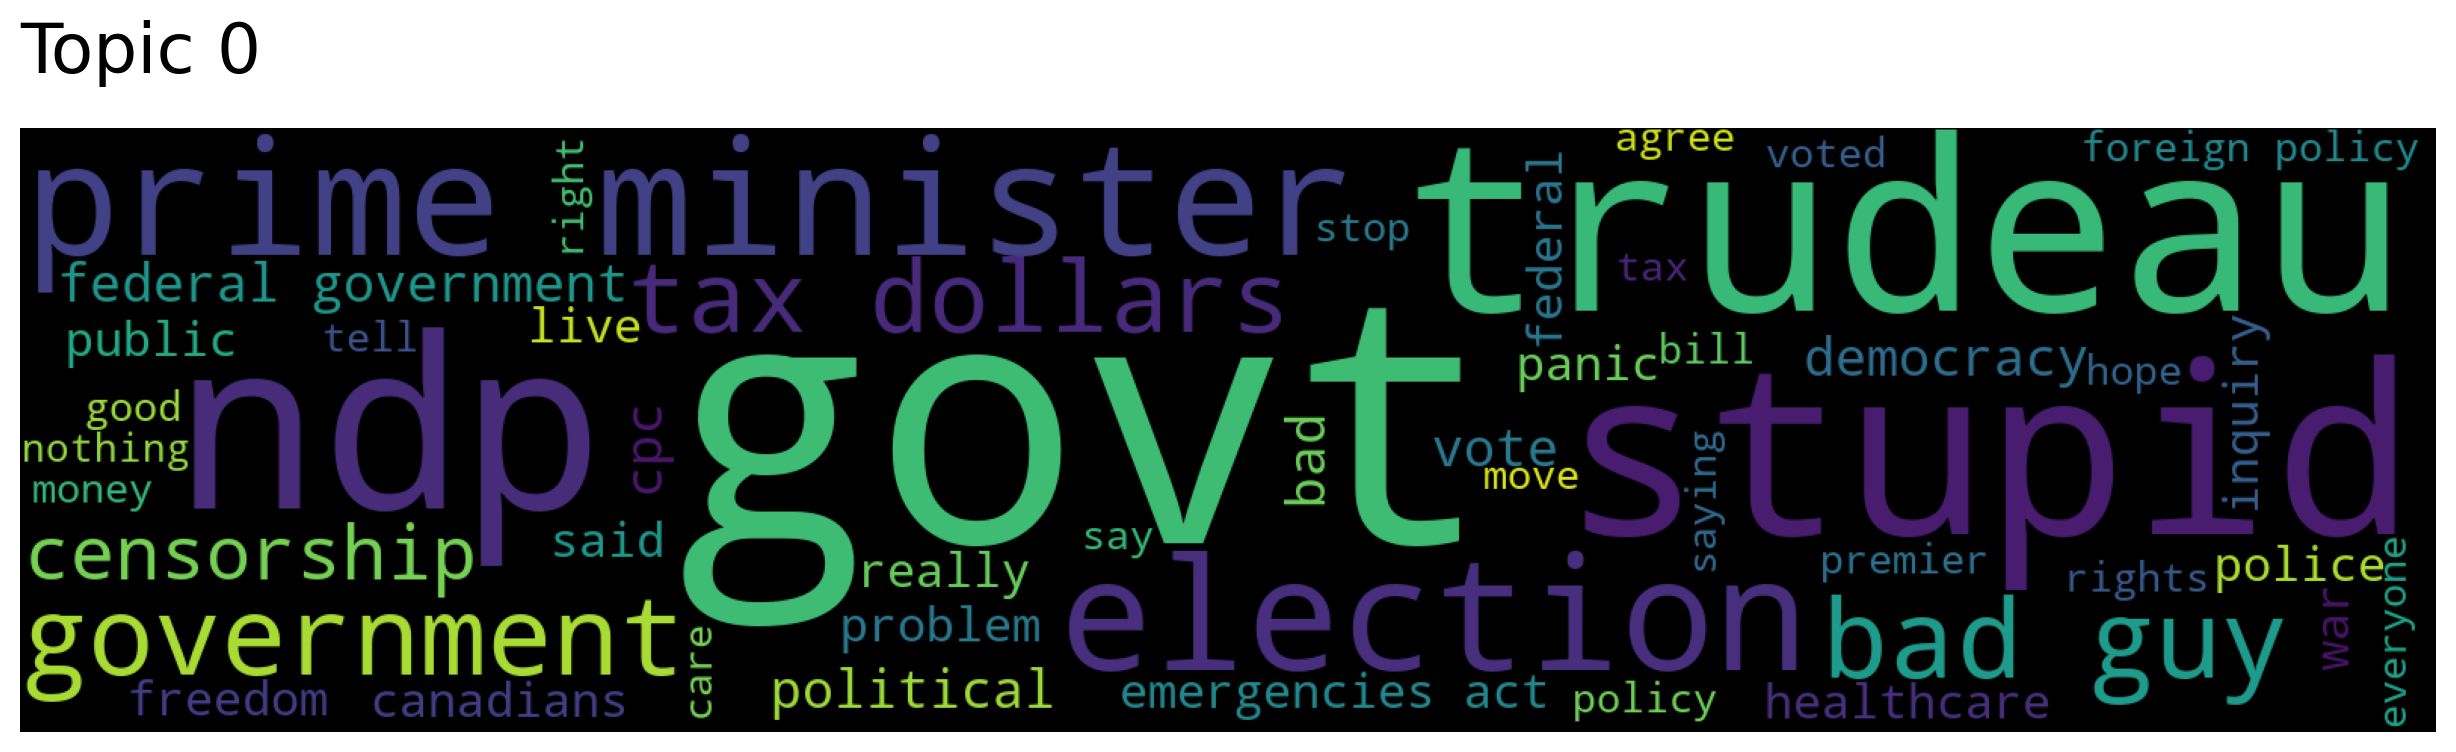

In [34]:
model_min_freq_10.generate_topic_wordcloud(0)

min frequency 5

In [ ]:
model_min_freq_5 = Top2Vec(stopword_omitted_docs, embedding_model='universal-sentence-encoder', min_count=5)

2022-11-12 20:34:07,281 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
2022-11-12 20:34:07,362 - top2vec - INFO - Downloading universal-sentence-encoder model
INFO:top2vec:Downloading universal-sentence-encoder model
2022-11-12 20:34:12,480 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2022-11-12 20:34:13,059 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2022-11-12 20:34:17,376 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2022-11-12 20:34:17,403 - top2v

In [ ]:
topic_words_min_freq_5, word_scores_min_freq_5, topic_nums_min_freq_5 = model_min_freq_5.get_topics()

In [ ]:
topic_words_min_freq_5

array([['conservatives', 'liberals', 'liberal', 'conservative',
        'protest', 'trudeau', 'trudeaus', 'ndp', 'harper', 'govt', 'gov',
        'politics', 'trump', 'politicians', 'stupid', 'bullshit',
        'election', 'cons', 'canadas', 'albertans', 'crap', 'fuck',
        'propaganda', 'resign', 'cpc', 'wrong', 'nonsense', 'government',
        'elected', 'citizens', 'seriously', 'mess', 'majority', 'govern',
        'censorship', 'marxist', 'misinformation', 'issues', 'political',
        'shit', 'violence', 'lol', 'hurt', 'win', 'canadians', 'vote',
        'democracy', 'panic', 'issue', 'problems'],
       ['ll', 'actually', 'way', 'it', 'dont', 'got', 'ok', 've', 'said',
        'really', 'along', 'shit', 'he', 'two', 'well', 'made', 'wrong',
        're', 'point', 'hey', 'thats', 'didnt', 'oh', 'you', 'that',
        'lol', 'answer', 'right', 'already', 'doesn', 'im', 'yet',
        'post', 'thing', 'year', 'put', 'question', 'still', 'help',
        'another', 'we', 'pleas

In [43]:
model_min_freq_25 = Top2Vec(stopword_omitted_docs, embedding_model='universal-sentence-encoder', min_count=25, ngram_vocab=True)

2022-11-14 17:49:03,401 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


ValueError: ignored

In [19]:
topic_words_min_freq_25, word_scores_min_freq_25, topic_nums_min_freq_25 = model_min_freq_25.get_topics()

In [21]:
topic_words_min_freq_25

array([['trudeau', 'ndp', 'prime minister', 'government', 'bad guy',
        'tax dollars', 'federal government', 'bad', 'emergencies act',
        'canadians', 'foreign policy', 'tax', 'money', 'good', 'care',
        'right', 'nothing', 'twitter', 'party', 'act', 'think', 'even',
        'know', 'go', 'many', 'smith', 'people', 'way', 'don',
        'child care', 'need', 'want', 'interest rates', 'take', 'time',
        'could', 'going', 'make', 'danielle smith', 'must', 'years',
        'you re', 'it'],
       ['way', 'it', 'right', 'you re', 'even', 'nothing', 'go', 'think',
        'need', 'years', 'know', 'many', 'going', 'take', 'good', 'must',
        'want', 'bad', 'make', 'time', 'act', 'tax', 'could', 'don',
        'care', 'money', 'people', 'party', 'bad guy', 'government',
        'twitter', 'canadians', 'tax dollars', 'trudeau',
        'prime minister', 'smith', 'federal government', 'ndp',
        'interest rates', 'danielle smith', 'foreign policy',
        'emergenci